**Моя работа включает по два раздела:**
1. **То, что я сделал сам**
1. **То, что я исправил после разбора (отмечаю блоком UPD)**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

### 1. Загрузить файл auto.csv

In [4]:
df = pd.read_csv('./auto.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

В данных присутствуют 16 числовых столбцов и 10 столбцов типа "object".

Null значения отсутствуют

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 2. Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)

In [6]:
numeric_df = df.select_dtypes(exclude=['object'])

In [7]:
# среднее
numeric_df.mean()

symboling                0.834146
normalized-losses      126.365854
wheel-base              98.756585
length                 174.049268
width                   65.907805
height                  53.724878
curb-weight           2555.565854
engine-size            126.907317
bore                     3.324878
stroke                   3.253366
compression-ratio       10.142537
horsepower             106.048780
peak-rpm              5131.463415
city-mpg                25.219512
highway-mpg             30.751220
price                13312.712195
dtype: float64

In [8]:
# медиана
numeric_df.median()

symboling                1.00
normalized-losses      122.00
wheel-base              97.00
length                 173.20
width                   65.50
height                  54.10
curb-weight           2414.00
engine-size            120.00
bore                     3.31
stroke                   3.29
compression-ratio        9.00
horsepower              95.00
peak-rpm              5200.00
city-mpg                24.00
highway-mpg             30.00
price                10295.00
dtype: float64

Среднее значение и медиана отличаются, т.к. в выборке не чётное кол-во рядов

In [9]:
# мода
numeric_df.mode()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,161.0,94.5,157.3,63.8,50.8,2385.0,92,3.62,3.4,9.0,68.0,5500.0,31.0,25.0,6785.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для столбца 'engine-size' получилось два ряда, попытаюсь выяснить из-за чего так. Моё первое предположение заключается в том, что в этом столбце присутствуют два одинаковых по моде значения

In [10]:
tested_column = 'engine-size'

for val in np.array(numeric_df[tested_column].mode()):
    val_count = len(numeric_df[numeric_df[tested_column] == val])
    print(f'Частота значений {val} в датафрейме равна {val_count}')

Частота значений 92 в датафрейме равна 15
Частота значений 122 в датафрейме равна 15


Моя гипотеза подтвердилась

In [11]:
# минимальное
numeric_df.min()

symboling              -2.00
normalized-losses      65.00
wheel-base             86.60
length                141.10
width                  60.30
height                 47.80
curb-weight          1488.00
engine-size            61.00
bore                    2.54
stroke                  2.07
compression-ratio       7.00
horsepower             48.00
peak-rpm             4150.00
city-mpg               13.00
highway-mpg            16.00
price                5118.00
dtype: float64

In [12]:
# максимальное
numeric_df.max()

symboling                3.00
normalized-losses      256.00
wheel-base             120.90
length                 208.10
width                   72.30
height                  59.80
curb-weight           4066.00
engine-size            326.00
bore                     3.94
stroke                   4.17
compression-ratio       23.00
horsepower             288.00
peak-rpm              6600.00
city-mpg                49.00
highway-mpg             54.00
price                45400.00
dtype: float64

In [13]:
# среднее отклонение
numeric_df.std()

symboling               1.245307
normalized-losses      35.438400
wheel-base              6.021776
length                 12.337289
width                   2.145204
height                  2.443522
curb-weight           520.680204
engine-size            41.642693
bore                    0.273049
stroke                  0.313937
compression-ratio       3.972040
horsepower             43.468803
peak-rpm              480.933330
city-mpg                6.542142
highway-mpg             6.886443
price                8102.472461
dtype: float64

#### UPD - я удалял строковые данные, чтобы вычисления не заваливались. Теперь я знаю чудо-метод describe

In [14]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [62]:
df.select_dtypes(include=['object']).mode()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi


### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

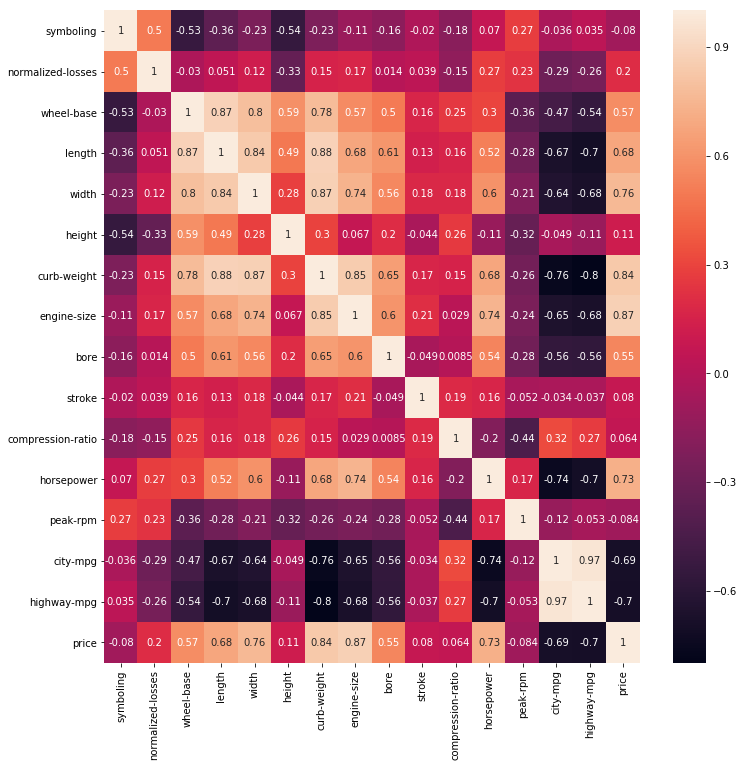

In [55]:
plt.subplots(figsize=(12, 12))
sns.heatmap(numeric_df.corr(), annot=True)

### 4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

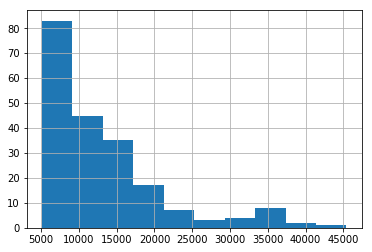

In [15]:
numeric_df['price'].hist()

In [61]:
# асимметрия
numeric_df['price'].skew()

1.7663998888191028

In [62]:
# коэффициент эксцесса
numeric_df['price'].kurtosis()

2.948637293212561

### 5. Визуализировать несколько взаимосвязей между переменными

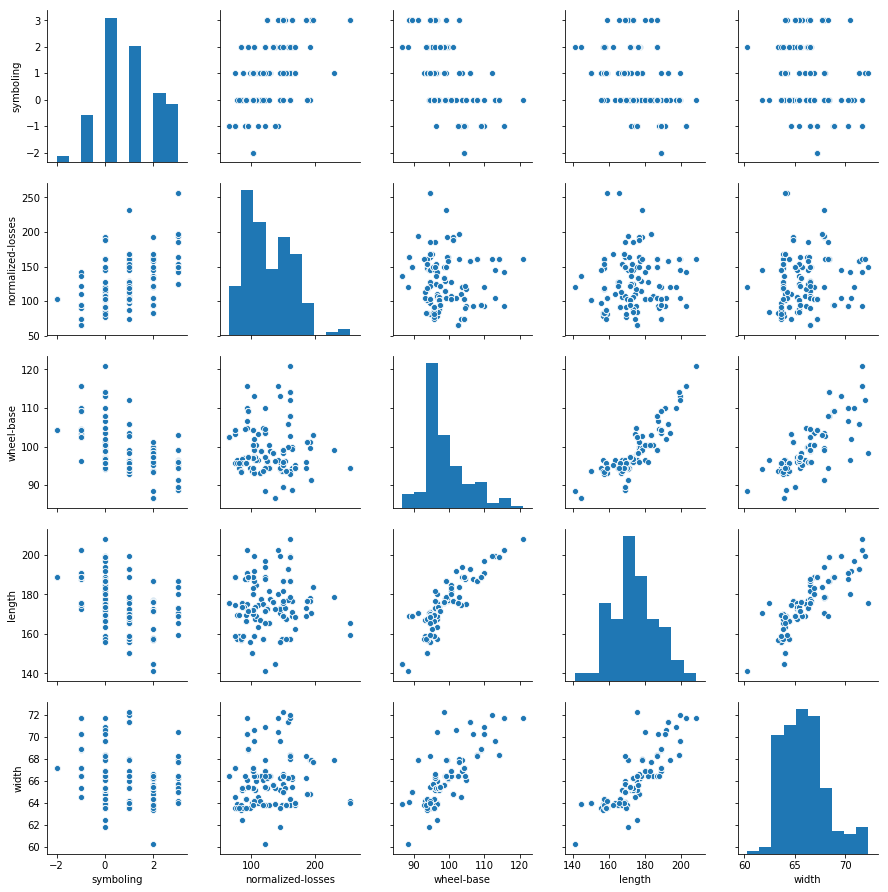

In [76]:
sns.pairplot(numeric_df.iloc[:,0:5])

### 6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test

#### UPD мои вычисления в этом задании были не верные. Можно перемотать до следующего заголовка UPD

#### Гипотезы:
1. 'peak-rpm' и 'engine-size' зависят друг от друга
1. 'city-mpg' и 'width' зависят друг от друга
1. 'highway-mpg' и 'width' зависят друг от друга
1. 'width' не зависит от 'engine-size'

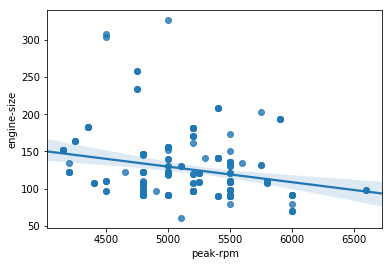

In [102]:
# 'peak-rpm' и 'engine-size' зависят друг от друга
sns.regplot(
    x=numeric_df['peak-rpm'],
    y=numeric_df['engine-size'],
    data=numeric_df,
    fit_reg=True
)

- Гипотеза не подтвердилась, данные слишком сильно разнятся и в них не проявляется линейной зависимости

##### Мне известна гипотеза, которая утверждает, что габбариты автомобиля прямо влияют на его расход топлива. Поэтому следующие две гипотезы проверяют это утверждение для движения по городу и трассе

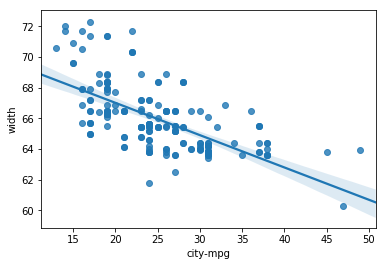

In [103]:
# 'city-mpg' и 'width' зависят друг от друга
sns.regplot(
    x=numeric_df['city-mpg'],
    y=numeric_df['width'],
    data=numeric_df,
    fit_reg=True
)

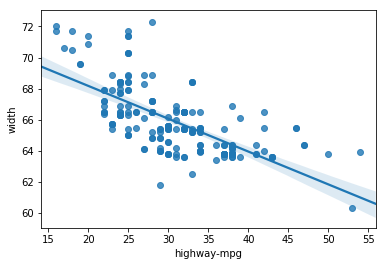

In [104]:
# 'highway-mpg' и 'width' зависят друг от друга
sns.regplot(
    x=numeric_df['highway-mpg'],
    y=numeric_df['width'],
    data=numeric_df,
    fit_reg=True
)

- Судя по последим двум графикам видно, что существует зависимость как для движения по городу, так и для движения по трассе по количеству пройденного пути на единицу топлива к ширине транспортного средства. Чем шире автомобиль, тем меньше пути он пройдёт на галон топлива. Это обусловлено тем, что более широкие автомобили встречаются с большим сопротивлением воздуха

In [107]:
# 'width' не зависит от 'engine-size'
stats.ttest_ind(
    numeric_df['width'],
    numeric_df['engine-size'],
)

Ttest_indResult(statistic=-20.94541599143699, pvalue=1.1347292344992041e-66)

- Судя по t-критерию и полученному pvalue, можно сделать вывод, что данные вряд ли зависимы и ширина автомобиля не зависит от размера двигателя

#### UPD ниже я выдвину новые гипотезы и проверю их

In [19]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

In [44]:
for col in df.select_dtypes(include='object').columns:
    print(f'{col}: {df[col].unique()}')

make: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type: ['gas' 'diesel']
aspiration: ['std' 'turbo']
num-of-doors: ['two' 'four']
body-style: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels: ['rwd' 'fwd' '4wd']
engine-location: ['front' 'rear']
engine-type: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
num-of-cylinders: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuel-system: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


#### Длина автомобиля зависит от количества дверей

In [74]:
stats.ttest_1samp(
    df[df['num-of-doors'] == 'two']['length'],
    df['length'].mean()
)

Ttest_1sampResult(statistic=-4.6159919813315256, pvalue=1.3246742483468986e-05)

Значение pvalue меньше, чем 0.05 и мы можем отвергнуть нулевую гипотезу о том, что длина авто с двумя дверьми похожа на длину авто в генеральной совокупности

#### Дизельные двигатели обычно больше чем бензиновые

In [79]:
diesel_es = df[df['fuel-type'] == 'diesel']['engine-size']
gas_es = df[df['fuel-type'] == 'gas']['engine-size']

diesel_es.std(), gas_es.std()

(32.11508909170923, 42.506371265021656)

In [80]:
stats.ttest_ind(
    df[df['fuel-type'] == 'diesel']['engine-size'],
    df[df['fuel-type'] == 'gas']['engine-size'],
    equal_var=False
)

Ttest_indResult(statistic=1.2440790736316307, pvalue=0.22425039780227282)